# Stardew Valley Crop Profitability EDA Notebook

In [32]:
# EDA: Most Profitable Crops Per Season
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
# Load the dataset
import pandas as pd


df = pd.read_csv('./crops.csv')


In [33]:
# Load Dataset
df = pd.read_csv("crops.csv")
df.head(21)

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Season,Sell Price (Seed),Regrowth Time (In Days),XP
0,Jazz Seeds,50,62,75,100,7,"[""Pierre's"", 'JojaMart']",Blue Jazz,['Spring'],15,NaN,NaN
1,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,['Spring'],15,NaN,NaN
2,Cauliflower Seeds,175,218,262,350,12,"[""Pierre's"", 'JojaMart']",Cauliflower,['Spring'],40,NaN,NaN
3,Coffee Bean,15,18,22,30,10,"['Traveling Cart', 'Dust Sprite']",NaN,"['Spring', 'Summer']",Coffee Bean,2.0,NaN
4,Garlic Seeds,60,75,90,120,4,"[""Pierre's""]",Garlic,['Spring'],20,NaN,NaN
5,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,['Spring'],30,3.0,NaN
6,Kale Seeds,110,137,165,220,6,"[""Pierre's"", 'JojaMart']",Kale,['Spring'],35,NaN,NaN
7,Parsnip Seeds,35,43,52,70,4,"[""Pierre's"", 'JojaMart']",Parsnip,['Spring'],10,NaN,NaN
8,Potato Seeds,80,100,120,160,6,"[""Pierre's"", 'JojaMart']",Potato,['Spring'],25,NaN,NaN
9,Rhubarb Seeds,220,275,330,440,13,['Oasis'],Rhubarb,['Spring'],50,NaN,NaN


In [34]:
# Data Cleaning
# Convert 'Season' column from string to list
df['Season'] = df['Season'].apply(ast.literal_eval)

# Drop missing crop names and prices
df_clean = df.dropna(subset=['Name', 'Price (Regular)', 'Sell Price (Seed)'])

# Convert Sell Price to numeric
df_clean['Sell Price (Seed)'] = pd.to_numeric(df_clean['Sell Price (Seed)'], errors='coerce')

# Calculate Profit
df_clean['Profit'] = df_clean['Sell Price (Seed)'] - df_clean['Price (Regular)']

# Explode seasons into separate rows
df_expanded = df_clean.explode('Season')

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3062485285.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sell Price (Seed)'] = pd.to_numeric(df_clean['Sell Price (Seed)'], errors='coerce')
/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3062485285.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Profit'] = df_clean['Sell Price (Seed)'] - df_clean['Price (Regular)']


In [35]:
# exploratory data analysis in numbers

df.info()
df.dtypes
df.shape
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seed                     41 non-null     object 
 1   Price (Regular)          41 non-null     int64  
 2   Price (Silver)           41 non-null     int64  
 3   Price (Gold)             41 non-null     int64  
 4   Price (Iridium)          41 non-null     int64  
 5   Growth Time (In Days)    41 non-null     int64  
 6   Purchase Source          41 non-null     object 
 7   Name                     40 non-null     object 
 8   Season                   41 non-null     object 
 9   Sell Price (Seed)        41 non-null     object 
 10  Regrowth Time (In Days)  15 non-null     float64
 11  XP                       0 non-null      float64
dtypes: float64(2), int64(5), object(5)
memory usage: 4.0+ KB


<bound method NDFrame.describe of                    Seed  Price (Regular)  Price (Silver)  Price (Gold)  \
0            Jazz Seeds               50              62            75   
1          Carrot Seeds               35              43            52   
2     Cauliflower Seeds              175             218           262   
3           Coffee Bean               15              18            22   
4          Garlic Seeds               60              75            90   
5          Bean Starter               40              50            60   
6            Kale Seeds              110             137           165   
7         Parsnip Seeds               35              43            52   
8          Potato Seeds               80             100           120   
9         Rhubarb Seeds              220             275           330   
10     Strawberry Seeds              120             150           180   
11           Tulip Bulb               30              37            45   
12  

In [36]:
# Rennaming Growth Time Column
df = df.rename(columns={'Growth Time (In Days)': 'growthTimeInDays'})

In [37]:
# Sort by growth time

df.sort_values(by=["growthTimeInDays"], ascending=True)

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),growthTimeInDays,Purchase Source,Name,Season,Sell Price (Seed),Regrowth Time (In Days),XP
1,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,[Spring],15,NaN,NaN
26,Wheat Seeds,25,31,37,50,4,"[""Pierre's"", 'JojaMart']",Wheat,"[Summer, Fall]",5,NaN,NaN
4,Garlic Seeds,60,75,90,120,4,"[""Pierre's""]",Garlic,[Spring],20,NaN,NaN
7,Parsnip Seeds,35,43,52,70,4,"[""Pierre's"", 'JojaMart']",Parsnip,[Spring],10,NaN,NaN
30,Bok Choy Seeds,80,100,120,160,4,"[""Pierre's"", 'JojaMart']",Bok Choy,[Fall],25,NaN,NaN
33,Eggplant Seeds,60,75,90,120,5,"[""Pierre's"", 'JojaMart']",Eggplant,[Fall],10,5.0,NaN
16,Pepper Seeds,40,50,60,80,5,"[""Pierre's"", 'JojaMart']",Hot Pepper,[Summer],20,3.0,NaN
11,Tulip Bulb,30,37,45,60,6,"[""Pierre's"", 'JojaMart']",Tulip,[Spring],10,NaN,NaN
19,Radish Seeds,90,112,135,180,6,"[""Pierre's"", 'JojaMart']",Radish,[Summer],20,NaN,NaN
29,Beet Seeds,100,125,150,200,6,['Oasis'],Beet,[Fall],10,NaN,NaN


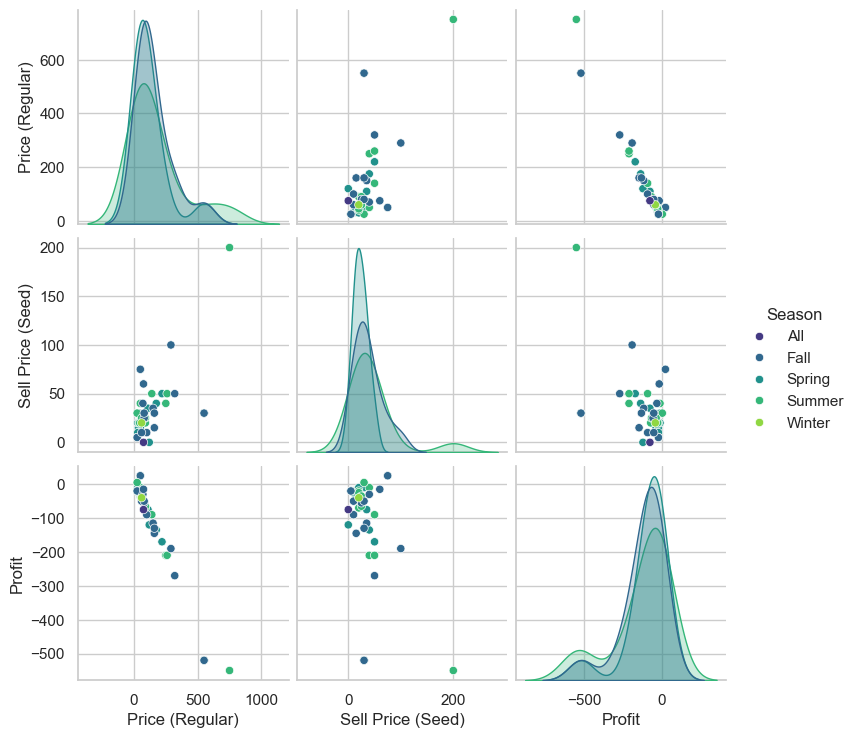

In [38]:
# Ensure 'Season' column is categorical and handle missing values
df_expanded['Season'] = df_expanded['Season'].astype('category')

# Drop rows with missing values in numerical columns used in the pairplot
df_expanded = df_expanded.dropna(subset=['Price (Regular)', 'Sell Price (Seed)', 'Profit'])

# Recreate the pairplot with corrected data
sns.pairplot(df_expanded, vars=['Price (Regular)', 'Sell Price (Seed)', 'Profit'], hue='Season', palette='viridis')
plt.show()

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3294414706.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_growth_time_sorted, y='Seed', x='growthTimeInDays', palette='Set2')


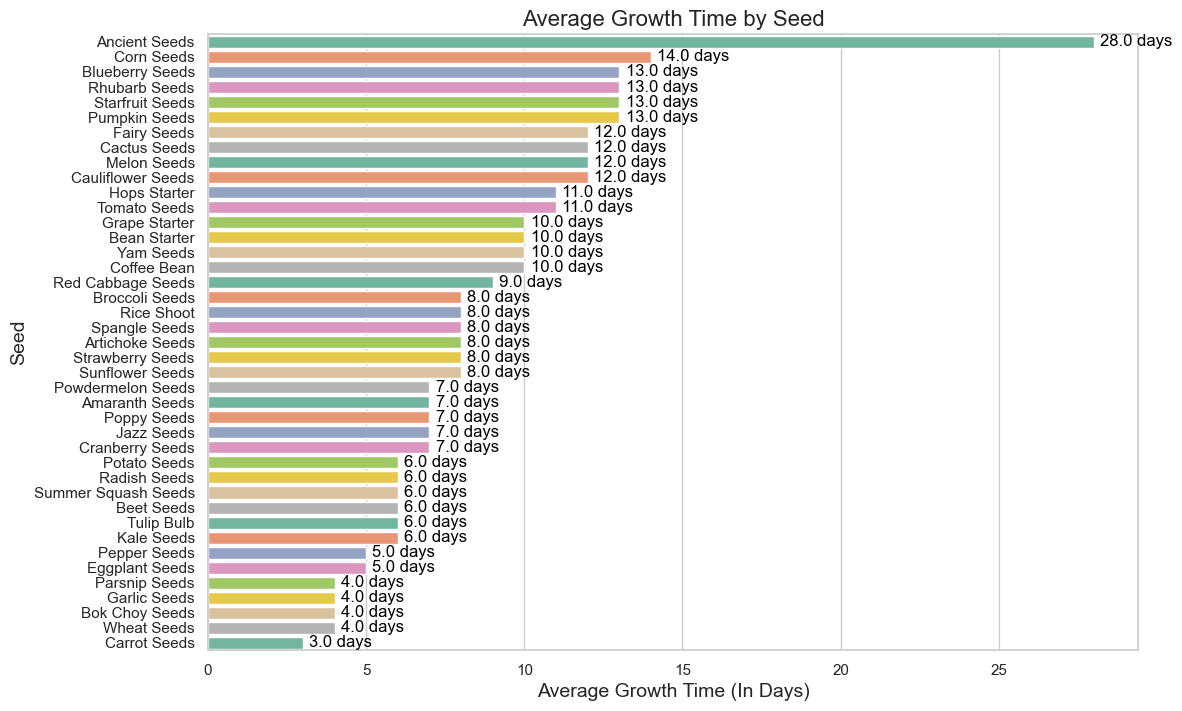

In [39]:
# EDA barchart on seed growth rate by day
 
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Seed' and calculate the mean of 'growthTimeInDays'
avg_growth_time = df.groupby('Seed')['growthTimeInDays'].mean().reset_index()

# Sort the values in descending order based on the average 'growthTimeInDays'
avg_growth_time_sorted = avg_growth_time.sort_values(by='growthTimeInDays', ascending=False)

# Create a horizontal bar plot with 'Seed' on the y-axis and the average 'growthTimeInDays' on the x-axis
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=avg_growth_time_sorted, y='Seed', x='growthTimeInDays', palette='Set2')

# Add labels (growth time) on top of the bars, rotated at a 45-degree angle
for p in ax.patches:
    width = p.get_width()
    y_position = p.get_y() + p.get_height() / 2  # Positioning the text at the center of the bar
    # Annotate the growth time values on top of the bars
    ax.annotate(f'{width:.1f} days',  # Display the growth time with "days"
                (width + 0.2, y_position),  # Slightly to the right of the bar
                ha='left', va='center',  # Position the text to the right of the bar
                fontsize=12, color='black')

# Adding title and labels
plt.title('Average Growth Time by Seed', fontsize=16)
plt.xlabel('Average Growth Time (In Days)', fontsize=14)
plt.ylabel('Seed', fontsize=14)

# Show the plot
plt.show()


In [40]:
# Top 3 Profitable Crops per Season
top_crops_per_season = df_expanded.groupby('Season').apply(
    lambda x: x.sort_values(by='Profit', ascending=False).head(6)
).reset_index(drop=True)

top_crops_per_season

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3000709003.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_crops_per_season = df_expanded.groupby('Season').apply(


,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Season,Sell Price (Seed),Regrowth Time (In Days),XP,Profit
0,Cactus Seeds,75,93,112,150,12,['Oasis'],Cactus Fruit,All,0.0,3.0,NaN,-75.0
1,Corn Seeds,50,62,75,100,14,"[""Pierre's"", 'JojaMart']",Corn,Fall,75.0,4.0,NaN,25.0
2,Cranberry Seeds,75,93,112,150,7,"[""Pierre's"", 'JojaMart']",Cranberries,Fall,60.0,5.0,NaN,-15.0
3,Wheat Seeds,25,31,37,50,4,"[""Pierre's"", 'JojaMart']",Wheat,Fall,5.0,NaN,NaN,-20.0
4,Broccoli Seeds,70,87,105,140,8,['Foraging'],Broccoli,Fall,40.0,4.0,NaN,-30.0
5,Eggplant Seeds,60,75,90,120,5,"[""Pierre's"", 'JojaMart']",Eggplant,Fall,10.0,5.0,NaN,-50.0
6,Grape Starter,80,100,120,160,10,"[""Pierre's"", 'JojaMart']",Grape,Fall,30.0,3.0,NaN,-50.0
7,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,Spring,30.0,3.0,NaN,-10.0
8,Rice Shoot,30,37,45,60,8,"[""Pierre's""]",Unmilled Rice,Spring,20.0,NaN,NaN,-10.0
9,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,Spring,15.0,NaN,NaN,-20.0


/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


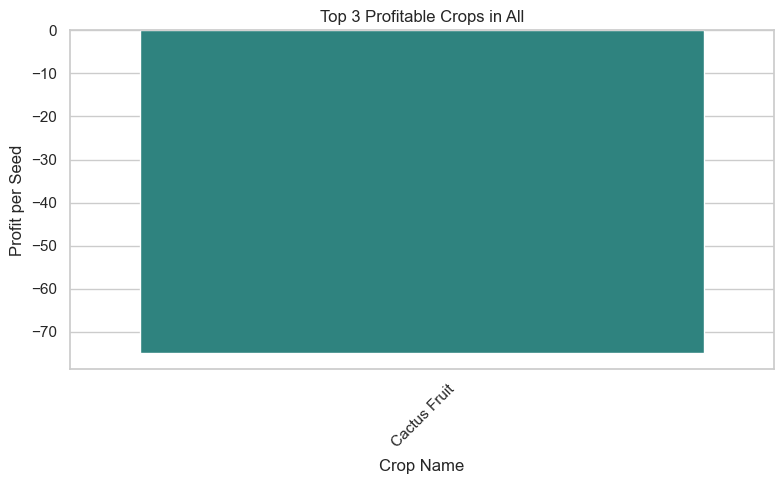

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


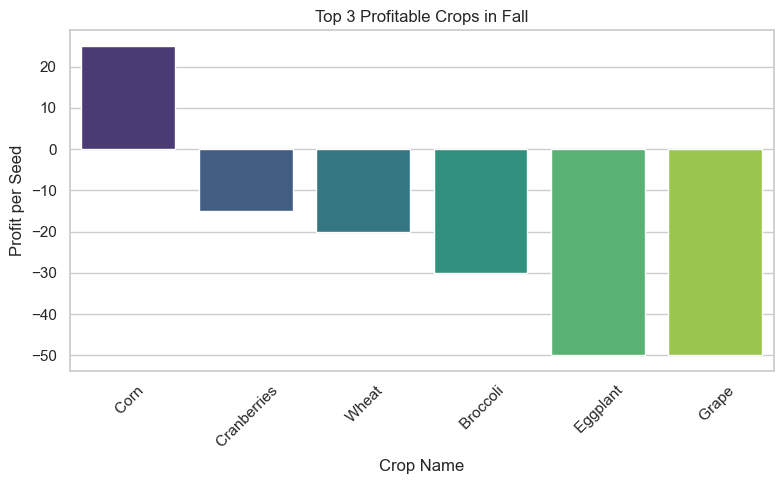

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


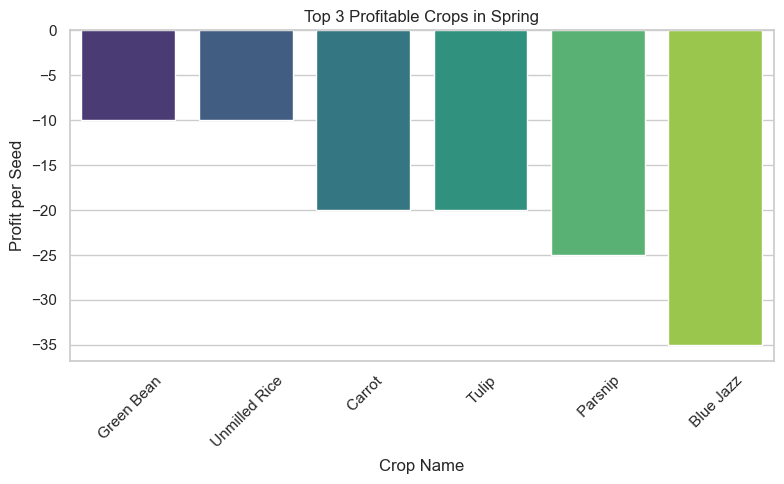

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


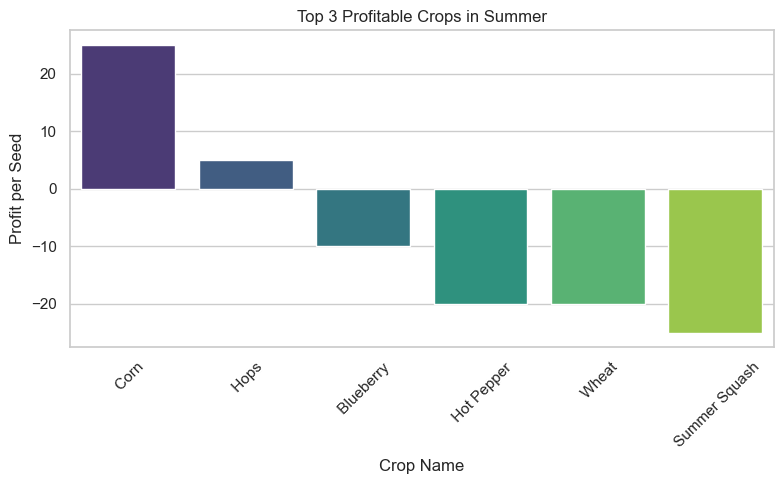

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_26424/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


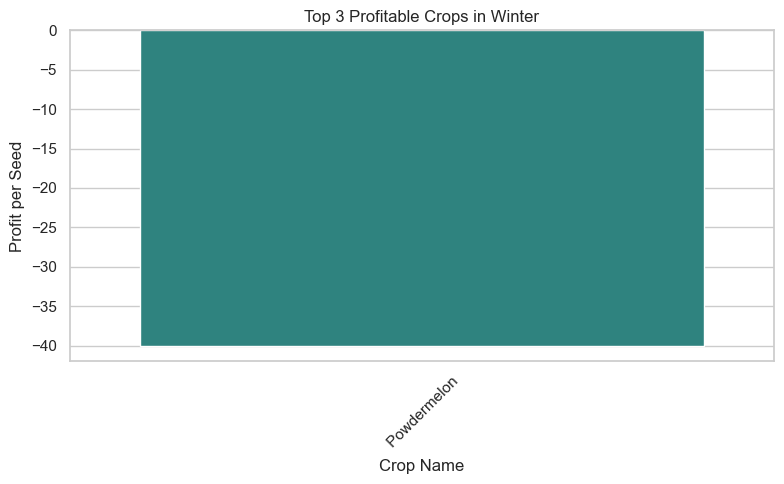

In [41]:
# Visualize Top Crops per Season
sns.set(style="whitegrid")
seasons = top_crops_per_season['Season'].unique()

for season in seasons:
    season_df = top_crops_per_season[top_crops_per_season['Season'] == season]
    plt.figure(figsize=(8, 5))
    sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')
    plt.title(f'Top 3 Profitable Crops in {season}')
    plt.xlabel('Crop Name')
    plt.ylabel('Profit per Seed')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();

### Summary of Analysis 🌽🌽 🧑‍🌾👩‍🌾

This analysis explores the profitability and growth characteristics of various crops in Stardew Valley across different seasons. Key insights from the visualizations and data include:

1. **Average Growth Time by Seed**:
    - Crops like *Ancient Seeds* and *Starfruit Seeds* have the longest growth times, taking up to 28 and 13 days, respectively.
    - Shorter growth time crops, such as *Carrot Seeds* and *Bok Choy Seeds*, grow in as little as 3-4 days, making them suitable for quick harvest cycles.

2. **Top Profitable Crops per Season**:
    - **Spring**: Crops like *Green Bean* and *Unmilled Rice* show relatively low losses, while others like *Blue Jazz* and *Parsnip* have higher negative profits.
    - **Summer**: *Corn* and *Hops* are among the few crops with positive profits, while *Starfruit* and *Melon* incur significant losses due to high seed costs.
    - **Fall**: *Corn* remains profitable, while crops like *Cranberries* and *Eggplant* show moderate losses.
    - **Winter**: Only *Powdermelon* is available, showing a negative profit margin.

3. **Profitability Trends**:
    - Many crops have negative profits when considering the difference between seed purchase price and sell price, highlighting the importance of optimizing crop selection for profitability.
    - Crops with regrowth cycles, such as *Corn* and *Blueberry*, tend to perform better in terms of profitability over time.

4. **Seasonal Crop Suitability**:
    - Each season offers a unique set of crops, with some crops like *Corn* spanning multiple seasons, providing flexibility in planning.
    - Winter has limited crop options, emphasizing the need for alternative income sources during this season.

Overall, the analysis underscores the importance of balancing growth time, seed cost, and sell price to maximize profitability in Stardew Valley farming.